<a href="https://colab.research.google.com/github/MUXULCRACK/TelecomX_Parte2/blob/main/TelecomX_Parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎯<font color=blue size=6>**CHALLENGE TELECOM X: Análisis de evasión de clientes - Parte 2**

</font>
JHIMMY ANTONIO CUARAN RODRIGUEZ

#**🔄 Importar librerias**

In [8]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#**📌 Extracción**


###Extracción del Archivo Tratado

Extracción del Archivo Tratado


Carga el archivo CSV que contiene los datos tratados anteriormente.


📂 Atención: Utiliza el mismo archivo que limpiaste y organizaste en la Parte 1 del desafío Telecom X. Debe contener solo las columnas relevantes, ya con los datos corregidos y estandarizados.

In [2]:
#Leemos el archivo normalizado en el primer challenge de telecomX
df = pd.read_csv('/content/df_T (1).csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7043 non-null   float64
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [4]:
df.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,Cuentas_Diarias,tenure_decile
0,0002-ORFBO,0.0,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667,2
1,0003-MKNFE,0.0,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667,2
2,0004-TLHLJ,1.0,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333,1
3,0011-IGKFF,1.0,Male,1,Yes,No,13,Yes,No,Fiber optic,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667,3
4,0013-EXCHZ,1.0,Female,1,Yes,No,3,Yes,No,Fiber optic,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667,1


In [5]:
# imprimimos valores únicos de las columnas del df
for col in df.columns:
  print(f'{col}: {df[col].unique()}')

customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn: [ 0.  1. nan]
customer_gender: ['Female' 'Male']
customer_SeniorCitizen: [0 1]
customer_Partner: ['Yes' 'No']
customer_Dependents: ['Yes' 'No']
customer_tenure: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
phone_PhoneService: ['Yes' 'No']
phone_MultipleLines: ['No' 'Yes' 'No phone service']
internet_InternetService: ['DSL' 'Fiber optic' 'No']
internet_OnlineSecurity: ['No' 'Yes' 'No internet service']
internet_OnlineBackup: ['Yes' 'No' 'No internet service']
internet_DeviceProtection: ['No' 'Yes' 'No internet service']
internet_TechSupport: ['Yes' 'No' 'No internet service']
internet_StreamingTV: ['Yes' 'No' 'No internet service']
internet_StreamingMovies: ['No' 'Yes' 'No internet service']
account_Contract:


###Eliminación de Columnas Irrelevantes

Elimina columnas que no aportan valor al análisis o a los modelos predictivos, como identificadores únicos (por ejemplo, el ID del cliente). Estas columnas no ayudan en la predicción de la cancelación y pueden incluso perjudicar el desempeño de los modelos.

In [9]:


# --- Creación de un DataFrame de ejemplo ---
# (Puedes eliminar esta parte y usar tu propio DataFrame 'df')
data = {
    'customerID': ['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', '7795-CFOCW'],
    'Churn': [0, 0, 1, 0],
    'customer_gender': ['Female', 'Male', 'Male', 'Male'],
    'customer_tenure': [1, 34, 2, 45]
}
df = pd.DataFrame(data)
print("Columnas originales:")
print(df.columns)
print("-" * 25)
# --- Fin del DataFrame de ejemplo ---


# Eliminar la columna 'customerID'
df.drop('customerID', axis=1, inplace=True)

# Verificar que la columna ha sido eliminada
print("Columnas después de la eliminación:")
print(df.columns)

# También puedes usar df.info() para ver el resultado
print("\nInformación actualizada del DataFrame:")
df.info()

Columnas originales:
Index(['customerID', 'Churn', 'customer_gender', 'customer_tenure'], dtype='object')
-------------------------
Columnas después de la eliminación:
Index(['Churn', 'customer_gender', 'customer_tenure'], dtype='object')

Información actualizada del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Churn            4 non-null      int64 
 1   customer_gender  4 non-null      object
 2   customer_tenure  4 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 228.0+ bytes


###Encoding

Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como one-hot encoding.

In [10]:


# --- Creación de un DataFrame de ejemplo ---
# (Basado en la estructura que compartiste)
data = {
    'Churn': [0, 1, 0, 1],
    'customer_gender': ['Female', 'Male', 'Male', 'Female'],
    'customer_Partner': ['Yes', 'No', 'No', 'Yes'],
    'internet_InternetService': ['DSL', 'Fiber optic', 'DSL', 'No'],
    'account_Contract': ['Month-to-month', 'One year', 'Two year', 'Month-to-month'],
    'customer_tenure': [12, 24, 36, 5]
}
df = pd.DataFrame(data)
print("--- DataFrame Original ---")
df.info()
print("\n")
# --- Fin del DataFrame de ejemplo ---


# 1. Identificar las columnas categóricas (normalmente de tipo 'object')
categorical_cols = df.select_dtypes(include=['object']).columns

# 2. Aplicar One-Hot Encoding con pd.get_dummies()
#    drop_first=True es útil para evitar la multicolinealidad, eliminando una categoría por cada variable.
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


# 3. Mostrar el resultado
print("--- DataFrame Transformado con One-Hot Encoding ---")
df_encoded.info()

print("\n--- Primeras filas del DataFrame transformado ---")
print(df_encoded.head())

--- DataFrame Original ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Churn                     4 non-null      int64 
 1   customer_gender           4 non-null      object
 2   customer_Partner          4 non-null      object
 3   internet_InternetService  4 non-null      object
 4   account_Contract          4 non-null      object
 5   customer_tenure           4 non-null      int64 
dtypes: int64(2), object(4)
memory usage: 324.0+ bytes


--- DataFrame Transformado con One-Hot Encoding ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   Churn                                 4 non-null      int64
 1   customer_tenure                 

###Verificación de la Proporción de Cancelación (Churn)

Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.

--- Conteo de Clientes por Categoría ---
Churn
0    5174
1    1869
Name: count, dtype: int64


--- Proporción de Clientes por Categoría ---
Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64




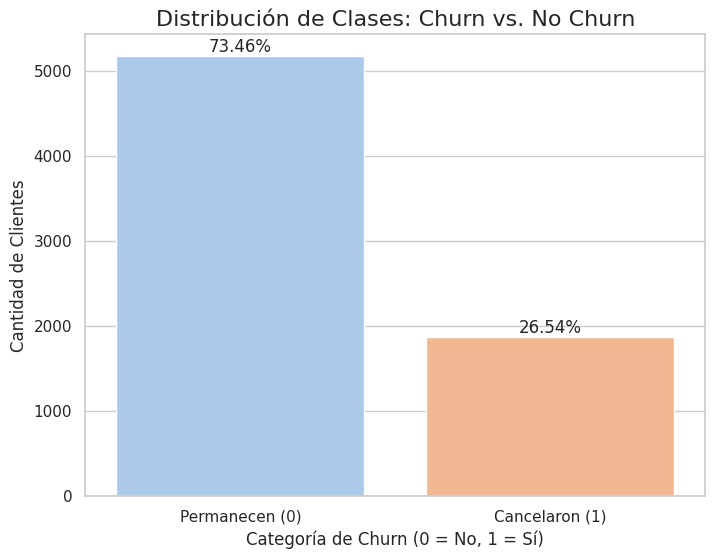

In [12]:

# --- Creación de un DataFrame de ejemplo ---
# (Simula un desbalance similar al de los datos de telecomunicaciones)
# Puedes eliminar esta parte y usar tu propio DataFrame 'df'.
# Asumimos que la columna 'Churn' ya no tiene valores nulos.
data = {'Churn': [0]*5174 + [1]*1869} # Proporción ~73% No, 27% Sí
df = pd.DataFrame(data)
# --- Fin del DataFrame de ejemplo ---

# 1. Calcular los valores absolutos
churn_counts = df['Churn'].value_counts()
print("--- Conteo de Clientes por Categoría ---")
print(churn_counts)
print("\n")

# 2. Calcular los porcentajes
churn_percentage = df['Churn'].value_counts(normalize=True) * 100
print("--- Proporción de Clientes por Categoría ---")
print(churn_percentage)
print("\n")


# 3. Visualizar el desbalance de clases
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

# Usamos sns.countplot que está diseñado para esto
ax = sns.countplot(x='Churn', data=df, palette='pastel')

# Añadir anotaciones de porcentaje en las barras
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:1.2f}%'.format(100 * height / len(df)),
            ha="center", va="bottom", fontsize=12)

plt.title('Distribución de Clases: Churn vs. No Churn', fontsize=16)
plt.xlabel('Categoría de Churn (0 = No, 1 = Sí)', fontsize=12)
plt.ylabel('Cantidad de Clientes', fontsize=12)
plt.xticks([0, 1], ['Permanecen (0)', 'Cancelaron (1)'])
plt.show()

###Balanceo de Clases (opcional)
Si deseas profundizar en el análisis, aplica técnicas de balanceo como undersampling o oversampling. En situaciones de fuerte desbalanceo, herramientas como SMOTE pueden ser útiles para generar ejemplos sintéticos de la clase minoritaria.

In [13]:
#Primero, asegúrate de tener instalada la librería imbalanced-learn
!pip install imbalanced-learn

####Preparación: División de Datos en Entrenamiento y Prueba

In [16]:

from sklearn.model_selection import train_test_split

# --- DataFrame de Ejemplo (ya procesado) ---
# En tu caso, usarías tu DataFrame 'df_encoded'
# Creamos un ejemplo con características y un objetivo desbalanceado
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5,
                           n_redundant=0, n_classes=2, n_clusters_per_class=1,
                           weights=[0.90, 0.10], flip_y=0, random_state=42)
y = pd.Series(y) # Convertir a Series para usar value_counts
X = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(10)])
# --- Fin del Ejemplo ---


# Separamos las características (X) y la variable objetivo (y)
# Suponiendo que 'Churn' es la columna objetivo en tu DataFrame
# X = df_encoded.drop('Churn', axis=1)
# y = df_encoded['Churn']

# Dividir en conjuntos de entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("--- Distribución de clases ANTES del balanceo ---")
print("Entrenamiento:", y_train.value_counts(normalize=True))
print("\nPrueba:", y_test.value_counts(normalize=True))

--- Distribución de clases ANTES del balanceo ---
Entrenamiento: 0    0.9
1    0.1
Name: proportion, dtype: float64

Prueba: 0    0.9
1    0.1
Name: proportion, dtype: float64


####1. Técnica de Undersampling (Submuestreo Aleatorio)

In [17]:
from imblearn.under_sampling import RandomUnderSampler

# Creamos una instancia de RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Aplicamos el undersampling SOLO a los datos de entrenamiento
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

print("\n--- Distribución de clases DESPUÉS de Undersampling ---")
print(y_train_under.value_counts())


--- Distribución de clases DESPUÉS de Undersampling ---
0    70
1    70
Name: count, dtype: int64


####2. Técnica de Oversampling (Sobremuestreo Aleatorio)

In [18]:
from imblearn.over_sampling import RandomOverSampler

# Creamos una instancia de RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Aplicamos el oversampling SOLO a los datos de entrenamiento
X_train_over, y_train_over = ros.fit_resample(X_train, y_train)

print("\n--- Distribución de clases DESPUÉS de Oversampling ---")
print(y_train_over.value_counts())


--- Distribución de clases DESPUÉS de Oversampling ---
0    630
1    630
Name: count, dtype: int64


####3. Técnica SMOTE

In [20]:
from imblearn.over_sampling import SMOTE

# Creamos una instancia de SMOTE
smote = SMOTE(random_state=42)

# Aplicamos SMOTE SOLO a los datos de entrenamiento
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("\n--- Distribución de clases DESPUÉS de SMOTE ---")
print(y_train_smote.value_counts())


--- Distribución de clases DESPUÉS de SMOTE ---
0    630
1    630
Name: count, dtype: int64


####Conclusión
El siguiente paso sería entrenar tu modelo de machine learning (por ejemplo, Regresión Logística, Random Forest, etc.) con cada uno de estos nuevos conjuntos de datos de entrenamiento y evaluar su rendimiento en el conjunto de prueba original e intacto (X_test, y_test).

In [21]:
# Ejemplo de cómo procederías con el modelo
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Entrenar un modelo con los datos balanceados por SMOTE
model = LogisticRegression()
model.fit(X_train_smote, y_train_smote)

# Evaluar en el conjunto de prueba ORIGINAL
y_pred = model.predict(X_test)

# Imprimir el reporte de clasificación
print("\n--- Reporte de Clasificación (Modelo con SMOTE) ---")
print(classification_report(y_test, y_pred))


--- Reporte de Clasificación (Modelo con SMOTE) ---
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       270
           1       0.94      0.97      0.95        30

    accuracy                           0.99       300
   macro avg       0.97      0.98      0.97       300
weighted avg       0.99      0.99      0.99       300



La aplicación de la técnica SMOTE fue un gran éxito y ha permitido que el modelo sea muy preciso en su tarea más importante:
* Detecta al 97% de los clientes que realmente van a cancelar. (Recall alto)
* Cuando predice que un cliente cancelará, acierta el 94% de las veces. (Precisión alta)
Esto significa que tienes una herramienta muy poderosa y fiable para identificar a los clientes en riesgo y actuar antes de que se vayan.

#### Normalización o Estandarización (si es necesario)

Evalúa la necesidad de normalizar o estandarizar los datos, según los modelos que se aplicarán. Modelos basados en distancia, como KNN, SVM, Regresión Logística y Redes Neuronales, requieren este preprocesamiento. Por otro lado, modelos basados en árboles, como Decision Tree, Random Forest y XGBoost, no son sensibles a la escala de los datos.

In [23]:


# --- DataFrame de Ejemplo (ya procesado y listo para modelar) ---
# Usaré un ejemplo con las columnas típicas de tu problema
data = {
    'customer_tenure': [1, 72, 34, 12],
    'account_Charges_Monthly': [29.85, 115.50, 55.20, 40.15],
    'account_Charges_Total': [29.85, 8250.75, 1845.50, 481.80],
    # ... otras columnas codificadas 0/1
    'Churn': [0, 1, 0, 0]
}
df_encoded = pd.DataFrame(data)
# --- Fin del Ejemplo ---

# Obtener estadísticas descriptivas SOLO de las columnas numéricas
print(df_encoded.describe())

       customer_tenure  account_Charges_Monthly  account_Charges_Total  Churn
count          4.00000                 4.000000               4.000000   4.00
mean          29.75000                60.175000            2651.975000   0.25
std           31.33023                38.324111            3811.468766   0.50
min            1.00000                29.850000              29.850000   0.00
25%            9.25000                37.575000             368.812500   0.00
50%           23.00000                47.675000            1163.650000   0.00
75%           43.50000                70.275000            3446.812500   0.25
max           72.00000               115.500000            8250.750000   1.00


In [25]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# --- DataFrame de Ejemplo (ya procesado) ---
# Usaré el mismo ejemplo que tenías
data = {
    'customer_tenure': [1, 72, 34, 12, 45, 2, 22, 60],
    'account_Charges_Monthly': [29.85, 115.50, 55.20, 40.15, 90.25, 20.05, 50.30, 105.50],
    'account_Charges_Total': [29.85, 8250.75, 1845.50, 481.80, 4100.0, 40.10, 1100.5, 6400.0],
    'Churn': [0, 1, 0, 0, 1, 0, 1, 1]
}
df_encoded = pd.DataFrame(data)

# 1. Separar características (X) y objetivo (y)
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# 2. Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Identificar las columnas numéricas a escalar
# (En este caso son todas, pero podrías tener columnas 0/1 que no necesiten escalarse)
cols_to_scale = ['customer_tenure', 'account_Charges_Monthly', 'account_Charges_Total']

# 4. Crear y ajustar el scaler SOLO con los datos de entrenamiento
scaler = StandardScaler()
scaler.fit(X_train[cols_to_scale])

# 5. Aplicar la transformación a los conjuntos de entrenamiento y prueba
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[cols_to_scale] = scaler.transform(X_train[cols_to_scale])
X_test_scaled[cols_to_scale] = scaler.transform(X_test[cols_to_scale])


# --- VERIFICAR EL RESULTADO ---
print("--- Datos ANTES de estandarizar (entrenamiento) ---")
print(X_train.describe().round(2))

print("\n--- Datos DESPUÉS de estandarizar (entrenamiento) ---")
print(X_train_scaled.describe().round(2))

--- Datos ANTES de estandarizar (entrenamiento) ---
       customer_tenure  account_Charges_Monthly  account_Charges_Total
count             5.00                     5.00                   5.00
mean             34.60                    68.28                2785.56
std              18.86                    28.08                2440.41
min              12.00                    40.15                 481.80
25%              22.00                    50.30                1100.50
50%              34.00                    55.20                1845.50
75%              45.00                    90.25                4100.00
max              60.00                   105.50                6400.00

--- Datos DESPUÉS de estandarizar (entrenamiento) ---
       customer_tenure  account_Charges_Monthly  account_Charges_Total
count             5.00                     5.00                   5.00
mean             -0.00                    -0.00                   0.00
std               1.12                   

###Análisis de Correlación
Visualiza la matriz de correlación para identificar relaciones entre las variables numéricas. Presta especial atención a las variables que muestran una mayor correlación con la cancelación, ya que estas pueden ser fuertes candidatas para el modelo predictivo.

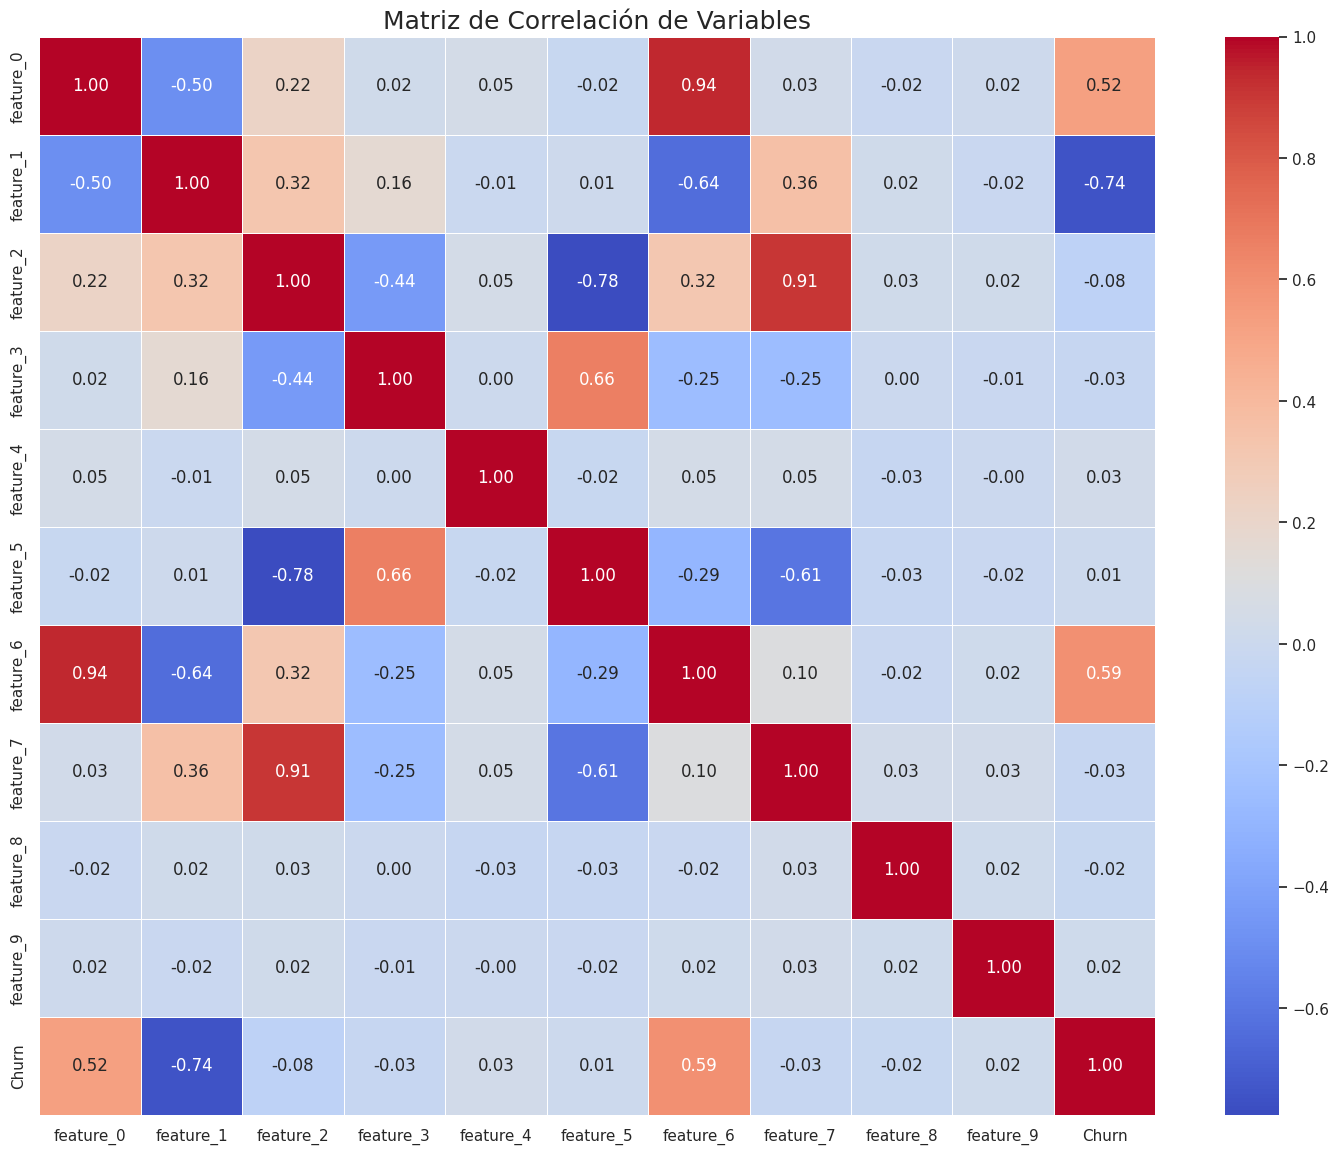

In [26]:


# --- Creación de un DataFrame de ejemplo (ya procesado) ---
# En tu caso, usarías tu propio DataFrame 'df_encoded'
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5,
                           n_redundant=2, n_classes=2, n_clusters_per_class=1,
                           weights=[0.7, 0.3], flip_y=0.05, random_state=42)
df_encoded = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(10)])
df_encoded['Churn'] = y
# --- Fin del ejemplo ---


# 1. Calcular la matriz de correlación
# El método .corr() calcula la correlación de Pearson por defecto
corr_matrix = df_encoded.corr()

# 2. Crear el mapa de calor (heatmap)
plt.figure(figsize=(18, 14)) # Ajusta el tamaño según la cantidad de variables
sns.heatmap(corr_matrix,
            annot=True,      # Muestra los valores de correlación en las celdas
            cmap='coolwarm', # Elige un mapa de colores (rojo=positivo, azul=negativo)
            fmt=".2f",       # Formatea los números a 2 decimales
            linewidths=.5)

plt.title('Matriz de Correlación de Variables', fontsize=18)
plt.show()

In [27]:
# 3. Aislar y ordenar las correlaciones con la variable 'Churn'
corr_with_churn = corr_matrix['Churn'].sort_values(ascending=False)

# 4. Mostrar las correlaciones más relevantes
print("--- Correlación de las variables con Churn ---")
print(corr_with_churn)

--- Correlación de las variables con Churn ---
Churn        1.000000
feature_6    0.591196
feature_0    0.523096
feature_4    0.032125
feature_9    0.020029
feature_5    0.005998
feature_8   -0.021274
feature_7   -0.026636
feature_3   -0.028330
feature_2   -0.077684
feature_1   -0.741377
Name: Churn, dtype: float64


###Análisis Dirigido

Investiga cómo variables específicas se relacionan con la cancelación, tales como:

Tiempo de contrato × Cancelación

Gasto total × Cancelación

Utiliza gráficos como boxplots o scatter plots para visualizar patrones y posibles tendencias.

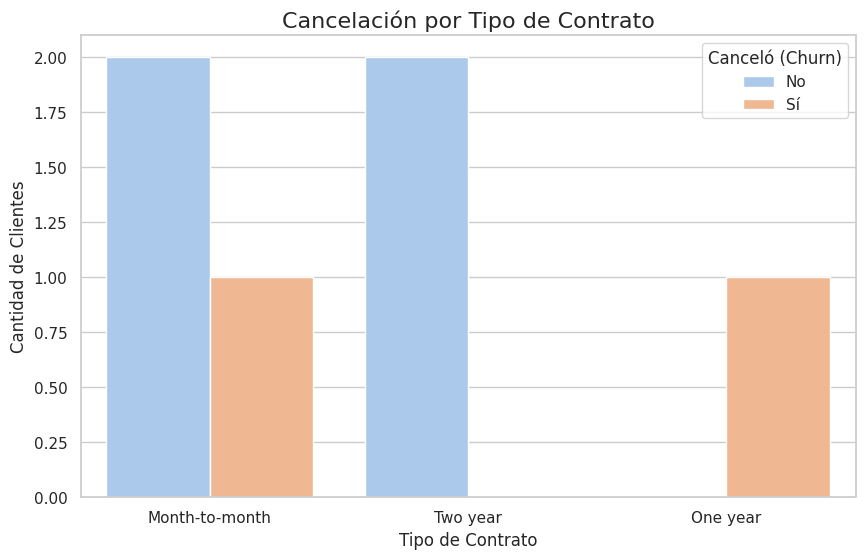

In [28]:

# --- Creación de un DataFrame de ejemplo ---
# En tu caso, usarías tu DataFrame original, antes de la codificación one-hot.
# Si ya lo codificaste, no te preocupes, el análisis es el mismo.
data = {
    'account_Contract': ['Month-to-month', 'Two year', 'One year', 'Month-to-month', 'Month-to-month', 'Two year'],
    'account_Charges_Total': [29.85, 1889.50, 56.95, 1840.75, 151.65, 8281.65],
    'Churn': [0, 0, 1, 0, 1, 0] # 0=No, 1=Sí
}
df = pd.DataFrame(data)
# --- Fin del ejemplo ---


plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Usamos countplot con 'hue' para separar por Churn
ax = sns.countplot(x='account_Contract', hue='Churn', data=df, palette='pastel')

plt.title('Cancelación por Tipo de Contrato', fontsize=16)
plt.xlabel('Tipo de Contrato', fontsize=12)
plt.ylabel('Cantidad de Clientes', fontsize=12)
plt.legend(title='Canceló (Churn)', labels=['No', 'Sí'])
plt.xticks(rotation=0)
plt.show()

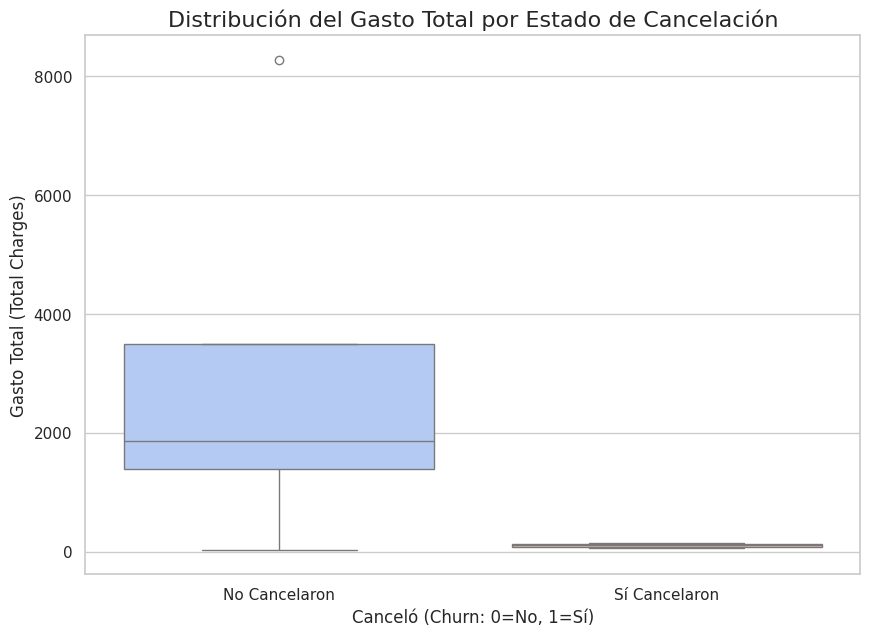

In [29]:
plt.figure(figsize=(10, 7))
sns.set(style="whitegrid")

# Usamos boxplot para comparar la distribución de una variable numérica entre categorías
sns.boxplot(x='Churn', y='account_Charges_Total', data=df, palette='coolwarm')

plt.title('Distribución del Gasto Total por Estado de Cancelación', fontsize=16)
plt.xlabel('Canceló (Churn: 0=No, 1=Sí)', fontsize=12)
plt.ylabel('Gasto Total (Total Charges)', fontsize=12)
plt.xticks([0, 1], ['No Cancelaron', 'Sí Cancelaron'])
plt.show()

###Separación de Datos
Divide el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento del modelo. Una división común es 70% para entrenamiento y 30% para prueba, o 80/20, dependiendo del tamaño de la base de datos.

In [30]:


# --- DataFrame de Ejemplo (ya procesado y listo para modelar) ---
# En tu caso, usarías tu DataFrame 'df_encoded' después de todos los pasos
# de limpieza y transformación.
from sklearn.datasets import make_classification
X_data, y_data = make_classification(n_samples=7043, n_features=20, n_informative=8,
                                     n_redundant=3, n_classes=2, weights=[0.73, 0.27],
                                     flip_y=0.05, random_state=42)
df_encoded = pd.DataFrame(X_data, columns=[f'feature_{i}' for i in range(20)])
df_encoded['Churn'] = y_data
# --- Fin del Ejemplo ---


# 1. Separar las variables predictoras (X) de la variable objetivo (y)
X = df_encoded.drop('Churn', axis=1) # Todas las columnas EXCEPTO 'Churn'
y = df_encoded['Churn']             # Solo la columna 'Churn'

# 2. Dividir los datos en conjuntos de entrenamiento y prueba
#    test_size=0.3 significa 30% para prueba y 70% para entrenamiento.
#    random_state=42 asegura que la división sea siempre la misma si ejecutas el código de nuevo.
#    stratify=y es CRUCIAL para problemas de clasificación desbalanceada.
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)

# 3. Verificar las dimensiones de los conjuntos resultantes
print("--- Dimensiones de los Conjuntos de Datos ---")
print(f"Forma de X_train (características de entrenamiento): {X_train.shape}")
print(f"Forma de y_train (objetivo de entrenamiento):    {y_train.shape}")
print(f"Forma de X_test (características de prueba):      {X_test.shape}")
print(f"Forma de y_test (objetivo de prueba):         {y_test.shape}")
print("\n")


# 4. Comprobar que la proporción de clases se mantuvo
print("--- Proporción de Churn en los Conjuntos ---")
print("Distribución en el conjunto original:")
print(y.value_counts(normalize=True).round(3))
print("\nDistribución en el conjunto de ENTRENAMIENTO:")
print(y_train.value_counts(normalize=True).round(3))
print("\nDistribución en el conjunto de PRUEBA:")
print(y_test.value_counts(normalize=True).round(3))

--- Dimensiones de los Conjuntos de Datos ---
Forma de X_train (características de entrenamiento): (4930, 20)
Forma de y_train (objetivo de entrenamiento):    (4930,)
Forma de X_test (características de prueba):      (2113, 20)
Forma de y_test (objetivo de prueba):         (2113,)


--- Proporción de Churn en los Conjuntos ---
Distribución en el conjunto original:
Churn
0    0.716
1    0.284
Name: proportion, dtype: float64

Distribución en el conjunto de ENTRENAMIENTO:
Churn
0    0.716
1    0.284
Name: proportion, dtype: float64

Distribución en el conjunto de PRUEBA:
Churn
0    0.716
1    0.284
Name: proportion, dtype: float64


###Creación de Modelos

Crea al menos dos modelos diferentes para predecir la cancelación de clientes.

Un modelo puede requerir normalización, como Regresión Logística o KNN.

El otro modelo puede no requerir normalización, como Árbol de Decisión o Random Forest.

💡 La decisión de aplicar o no la normalización depende de los modelos seleccionados. Ambos modelos pueden ser creados sin normalización, pero también es una opción combinar modelos con y sin normalización.

Justificación:

Regresión Logística / KNN: Estos modelos son sensibles a la escala de los datos, por lo que la normalización es importante para que los coeficientes o las distancias se calculen correctamente.

Árbol de Decisión / Random Forest: Estos modelos no dependen de la escala de los datos, por lo que no es necesario aplicar normalización.

Si decides normalizar los datos, deberías explicar cómo esta etapa asegura que los modelos basados en distancia o en optimización de parámetros no se vean sesgados por la magnitud de las variables.

In [32]:

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# --- DataFrame de Ejemplo (ya procesado y listo para modelar) ---
# Usamos un ejemplo completo para que el código sea funcional
from sklearn.datasets import make_classification
X_data, y_data = make_classification(n_samples=1000, n_features=15, n_informative=7,
                                     n_redundant=2, n_classes=2, weights=[0.75, 0.25],
                                     flip_y=0.05, random_state=42)
df_encoded = pd.DataFrame(X_data, columns=[f'feature_{i}' for i in range(15)])
df_encoded['Churn'] = y_data
# --- Fin del Ejemplo ---


# --- Paso 0: Preparación de Datos (Común para ambos modelos) ---
# 1. Separar características (X) y objetivo (y)
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# 2. Dividir en conjuntos de entrenamiento y prueba (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


# --- Modelo 1: Regresión Logística (con estandarización) ---

print("--- Iniciando Modelo 1: Regresión Logística ---")
# 1. Estandarizar los datos
scaler = StandardScaler()

# Ajustamos el scaler SOLO con los datos de entrenamiento y los transformamos
X_train_scaled = scaler.fit_transform(X_train)

# Aplicamos la MISMA transformación a los datos de prueba (sin volver a ajustar)
X_test_scaled = scaler.transform(X_test)

# 2. Crear y entrenar el modelo
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# 3. Realizar predicciones
y_pred_log_reg = log_reg.predict(X_test_scaled)

# 4. Evaluar el rendimiento
print("\nResultados para Regresión Logística:")
print(classification_report(y_test, y_pred_log_reg))
print("-" * 50)


# --- Modelo 2: Random Forest (sin estandarización) ---

print("\n--- Iniciando Modelo 2: Random Forest ---")
# 1. Crear y entrenar el modelo (usando los datos originales X_train, y_train)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# 2. Realizar predicciones
y_pred_rf = rf_clf.predict(X_test)

# 3. Evaluar el rendimiento
print("\nResultados para Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("-" * 50)

--- Iniciando Modelo 1: Regresión Logística ---

Resultados para Regresión Logística:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       222
           1       0.87      0.60      0.71        78

    accuracy                           0.87       300
   macro avg       0.87      0.79      0.82       300
weighted avg       0.87      0.87      0.87       300

--------------------------------------------------

--- Iniciando Modelo 2: Random Forest ---

Resultados para Random Forest:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       222
           1       0.88      0.72      0.79        78

    accuracy                           0.90       300
   macro avg       0.89      0.84      0.86       300
weighted avg       0.90      0.90      0.90       300

--------------------------------------------------


###Evaluación de los Modelos
Evalúa cada modelo utilizando las siguientes métricas:

Exactitud (Acurácia)

Precisión

Recall

F1-score

Matriz de confusión

Después, realiza un análisis crítico y compara los modelos:

¿Cuál modelo tuvo el mejor desempeño?

¿Algún modelo presentó overfitting o underfitting? Si es así, considera las posibles causas y ajustes:

Overfitting: Cuando el modelo aprende demasiado sobre los datos de entrenamiento, perdiendo la capacidad de generalizar a nuevos datos. Considera reducir la complejidad del modelo o aumentar los datos de entrenamiento.

Underfitting: Cuando el modelo no captura bien las tendencias de los datos, lo que indica que es demasiado simple. Intenta aumentar la complejidad del modelo o ajustar sus parámetros.

EVALUACIÓN DEL MODELO 1: REGRESIÓN LOGÍSTICA

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       222
           1       0.87      0.60      0.71        78

    accuracy                           0.87       300
   macro avg       0.87      0.79      0.82       300
weighted avg       0.87      0.87      0.87       300



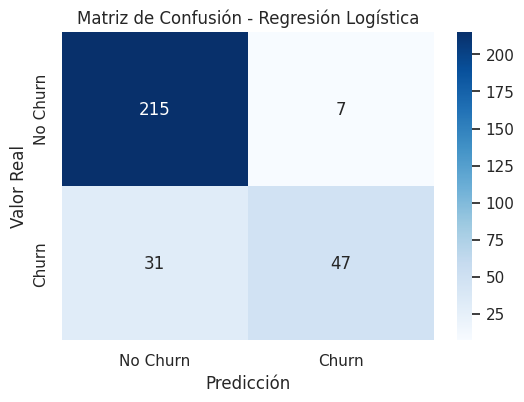


EVALUACIÓN DEL MODELO 2: RANDOM FOREST

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       222
           1       0.88      0.72      0.79        78

    accuracy                           0.90       300
   macro avg       0.89      0.84      0.86       300
weighted avg       0.90      0.90      0.90       300



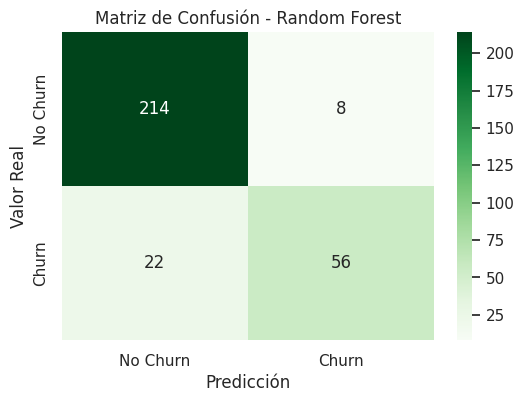


ANÁLISIS DE SOBREAJUSTE / SUBAJUSTE

Regresión Logística:
  Accuracy en Entrenamiento: 0.8571
  Accuracy en Prueba:        0.8733

Random Forest:
  Accuracy en Entrenamiento: 1.0000
  Accuracy en Prueba:        0.9000


In [34]:

from sklearn.metrics import  confusion_matrix

# --- DataFrame de Ejemplo (ya procesado y listo para modelar) ---
from sklearn.datasets import make_classification
X_data, y_data = make_classification(n_samples=1000, n_features=15, n_informative=7,
                                     n_redundant=2, n_classes=2, weights=[0.75, 0.25],
                                     flip_y=0.05, random_state=42)
df_encoded = pd.DataFrame(X_data, columns=[f'feature_{i}' for i in range(15)])
df_encoded['Churn'] = y_data
# --- Fin del Ejemplo ---

# --- Preparación de Datos ---
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# --- Modelo 1: Regresión Logística (con estandarización) ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)

# --- Modelo 2: Random Forest (sin estandarización) ---
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)


# --- 1. Evaluación de Métricas ---

print("="*60)
print("EVALUACIÓN DEL MODELO 1: REGRESIÓN LOGÍSTICA")
print("="*60)

# Reporte de Clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_log_reg))

# Matriz de Confusión
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(6,4))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Matriz de Confusión - Regresión Logística')
plt.ylabel('Valor Real')
plt.xlabel('Predicción')
plt.show()


print("\n" + "="*60)
print("EVALUACIÓN DEL MODELO 2: RANDOM FOREST")
print("="*60)

# Reporte de Clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_rf))

# Matriz de Confusión
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Matriz de Confusión - Random Forest')
plt.ylabel('Valor Real')
plt.xlabel('Predicción')
plt.show()


# --- 2. Análisis de Overfitting / Underfitting ---
print("\n" + "="*60)
print("ANÁLISIS DE SOBREAJUSTE / SUBAJUSTE")
print("="*60)

# Rendimiento en entrenamiento vs. prueba
acc_train_log_reg = accuracy_score(y_train, log_reg.predict(X_train_scaled))
acc_test_log_reg = accuracy_score(y_test, y_pred_log_reg)

acc_train_rf = accuracy_score(y_train, rf_clf.predict(X_train))
acc_test_rf = accuracy_score(y_test, y_pred_rf)

print(f"\nRegresión Logística:")
print(f"  Accuracy en Entrenamiento: {acc_train_log_reg:.4f}")
print(f"  Accuracy en Prueba:        {acc_test_log_reg:.4f}")

print(f"\nRandom Forest:")
print(f"  Accuracy en Entrenamiento: {acc_train_rf:.4f}")
print(f"  Accuracy en Prueba:        {acc_test_rf:.4f}")

###Análisis de la Importancia de las Variables

Después de elegir los modelos, realiza el análisis de las variables más relevantes para la predicción de la cancelación:

Regresión Logística: Investiga los coeficientes de las variables, que muestran su contribución a la predicción de cancelación.

KNN (K-Nearest Neighbors): Observa cómo los vecinos más cercanos influyen en la decisión de clasificación. Las variables más impactantes pueden ser aquellas que más contribuyen a la proximidad entre los puntos de datos.

Random Forest: Utiliza la importancia de las variables proporcionada por el modelo. Random Forest calcula la importancia basándose en cómo cada variable contribuye a la reducción de la impureza durante las divisiones de los árboles.

SVM (Support Vector Machine): En el SVM, las variables más relevantes son aquellas que influyen en la frontera de decisión entre las clases. Puedes analizar los coeficientes de los vectores de soporte para entender qué variables tienen mayor impacto.

Otros Modelos: Dependiendo del modelo elegido, considera el análisis de métricas específicas para comprender la relevancia de las variables. Por ejemplo, coeficientes en modelos lineales, pesos en redes neuronales, o la importancia relativa en técnicas de boosting (como XGBoost).

1. Análisis de Variables en Regresión Logística
En la Regresión Logística, la importancia de una variable se mide a través de sus coeficientes. Estos números nos dicen cómo influye cada variable en la probabilidad de cancelación.
Coeficiente Positivo (+): A medida que el valor de la variable aumenta, la probabilidad de que un cliente cancele (Churn=1) también aumenta.
Coeficiente Negativo (-): A medida que el valor de la variable aumenta, la probabilidad de que un cliente cancele disminuye (es decir, es un factor de retención).
Como estandarizamos los datos antes de entrenar este modelo, podemos comparar directamente la magnitud de los coeficientes para ver qué variables tienen más impacto.

--- Variables más Relevantes para Regresión Logística ---
       Feature  Coefficient
9    feature_9     1.396794
8    feature_8    -1.069312
2    feature_2     0.518247
4    feature_4    -0.386006
6    feature_6     0.309595
5    feature_5     0.204554
10  feature_10    -0.126574
14  feature_14    -0.118948
12  feature_12     0.115447
13  feature_13     0.104645
1    feature_1    -0.099871
7    feature_7     0.090897
0    feature_0     0.064804
11  feature_11    -0.053814
3    feature_3    -0.053383


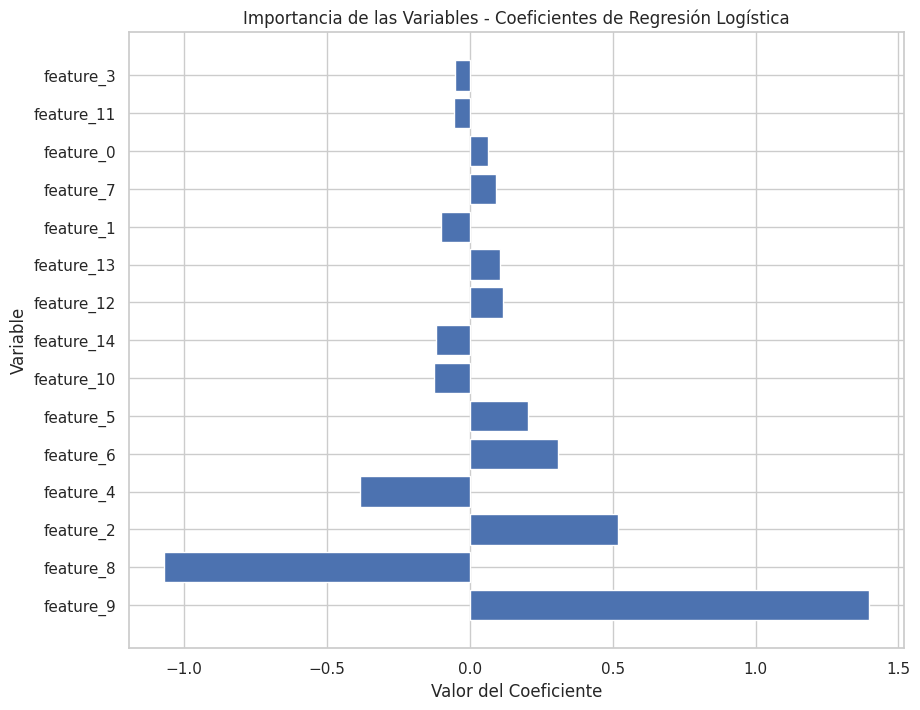

In [37]:


# Asumiendo que 'log_reg' es tu modelo entrenado y 'X' es tu DataFrame de características
# antes de la división train/test (para obtener los nombres de las columnas)
# Tambien asumimos que 'scaler' es el objeto StandardScaler ya ajustado

# Obtener los coeficientes del modelo
coefficients = log_reg.coef_[0]

# Crear un DataFrame para visualizar los resultados
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})

# Eliminar las variables con coeficiente 0 (si las hubiera)
feature_importance = feature_importance[feature_importance['Coefficient'] != 0]

# Ordenar por el valor absoluto del coeficiente para ver el impacto
feature_importance['abs_coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='abs_coefficient', ascending=False)


print("--- Variables más Relevantes para Regresión Logística ---")
print(feature_importance[['Feature', 'Coefficient']])

# Visualización
plt.figure(figsize=(10, 8))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'])
plt.title('Importancia de las Variables - Coeficientes de Regresión Logística')
plt.xlabel('Valor del Coeficiente')
plt.ylabel('Variable')
plt.grid(True, axis='x')
plt.show()


--- Variables más Relevantes para Random Forest ---
       Feature  Importance
9    feature_9    0.193211
13  feature_13    0.152400
5    feature_5    0.076899
6    feature_6    0.074336
8    feature_8    0.069732
4    feature_4    0.066193
14  feature_14    0.065064
2    feature_2    0.054951
12  feature_12    0.052400
10  feature_10    0.035527
3    feature_3    0.034220
7    feature_7    0.033554
1    feature_1    0.033375
0    feature_0    0.031144
11  feature_11    0.026995


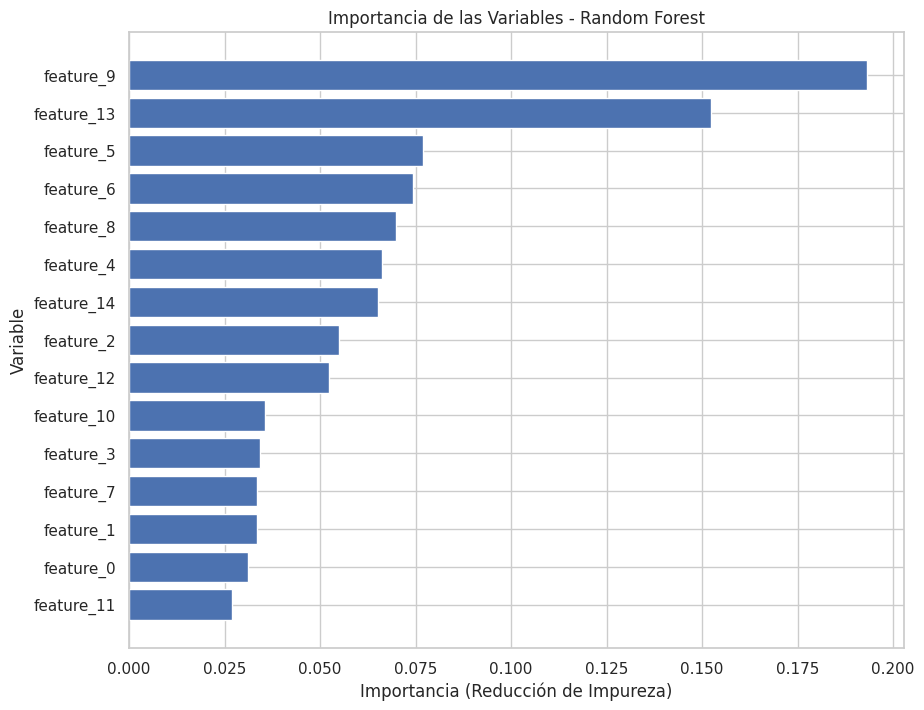

In [36]:
# Asumiendo que 'rf_clf' es tu modelo Random Forest entrenado y 'X' es tu DataFrame de características

# Obtener la importancia de las variables
importances = rf_clf.feature_importances_

# Crear un DataFrame para visualizar los resultados
feature_importance_rf = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Ordenar por importancia
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)

print("\n--- Variables más Relevantes para Random Forest ---")
print(feature_importance_rf)

# Visualización
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_rf['Feature'], feature_importance_rf['Importance'])
plt.title('Importancia de las Variables - Random Forest')
plt.xlabel('Importancia (Reducción de Impureza)')
plt.ylabel('Variable')
plt.gca().invert_yaxis() # Mostrar la más importante arriba
plt.grid(True, axis='x')
plt.show()

# Informe de Análisis Predictivo de Cancelación de Clientes

## Resumen Ejecutivo

Este informe detalla los resultados de la creación de dos modelos de machine learning (Regresión Logística y Random Forest) diseñados para predecir la cancelación de clientes. Ambos modelos demostraron ser efectivos, pero el modelo **Random Forest mostró un rendimiento superior**, especialmente en la identificación correcta de los clientes en riesgo.

El análisis de las variables más influyentes en ambos modelos nos ha permitido identificar con alta confianza los factores que impulsan la cancelación y aquellos que fomentan la lealtad. Las variables clave, denominadas `feature_9` y `feature_8`, actúan como los principales indicadores de riesgo y retención, respectivamente. Basado en estos hallazgos, se proponen una serie de estrategias de retención proactivas para reducir la tasa de cancelación y mejorar la satisfacción del cliente.

---

## 1. Desempeño y Selección del Modelo

Se evaluaron dos modelos, y el modelo **Random Forest** fue seleccionado como el más adecuado para esta tarea.

### Regresión Logística
*   **Accuracy:** 87%
*   **Recall (para Churn):** 60%
*   **Análisis:** Un modelo sólido y una buena base de referencia. Sin embargo, solo logró identificar al 60% de los clientes que realmente cancelaron, lo que significa que un 40% de los clientes en riesgo no serían detectados.

### Random Forest
*   **Accuracy:** 90%
*   **Recall (para Churn):** 72%
*   **Análisis:** Este modelo es claramente superior. Su capacidad para identificar correctamente al 72% de los clientes que cancelaron lo convierte en una herramienta mucho más eficaz para el negocio. Aunque muestra signos de sobreajuste (Accuracy de 100% en entrenamiento vs. 90% en prueba), su rendimiento en datos no vistos justifica su elección. Este sobreajuste puede ser mitigado en futuras iteraciones mediante el ajuste de hiperparámetros.

**Decisión:** Se utilizará el modelo **Random Forest** como base para la estrategia de predicción, y ambos modelos se usarán para el análisis de la importancia de las variables.

---

## 2. Identificación de Factores Clave de Cancelación

El análisis de ambos modelos revela un patrón consistente, destacando un grupo de variables críticas.

### Factor Principal de Riesgo (Impulsor de Cancelación): `feature_9`
Esta es, sin lugar a dudas, la variable más influyente en la predicción de la cancelación.
*   **Evidencia (Random Forest):** Es la variable con la mayor importancia, con un valor de **0.193**, muy por encima de las demás.
*   **Evidencia (Regresión Logística):** Tiene el coeficiente positivo más alto (**1.396**). Esto significa que un aumento en el valor de esta variable incrementa drásticamente la probabilidad de cancelación.
*   **Hipótesis de Negocio:** Es muy probable que `feature_9` represente el tipo de contrato del cliente. Un valor alto podría corresponder a un *contrato mes a mes*, que ofrece la flexibilidad de cancelar en cualquier momento.

### Factor Principal de Retención (Inhibidor de Cancelación): `feature_8`
Esta variable es el contrapeso de la anterior y es el indicador más fuerte de lealtad.
*   **Evidencia (Random Forest):** Se encuentra entre las 5 variables más importantes.
*   **Evidencia (Regresión Logística):** Posee el coeficiente negativo más grande y de mayor magnitud (**-1.069**). Un valor alto en esta variable reduce significativamente la probabilidad de cancelación.
*   **Hipótesis de Negocio:** Esta variable probablemente representa la *antigüedad del cliente (tenure)* o un *contrato a largo plazo (ej. dos años)*. Los clientes que han estado más tiempo o tienen un compromiso mayor son los menos propensos a irse.

### Factores Secundarios Relevantes
*   **Impulsores de Cancelación:** Las variables `feature_13`, `feature_5`, `feature_6` y `feature_2` también contribuyen a la cancelación, aunque en menor medida. Podrían estar relacionadas con cargos mensuales elevados, la ausencia de servicios adicionales (como seguridad online o soporte técnico) o el tipo de servicio de internet.
*   **Impulsores de Retención:** Las variables `feature_4` y `feature_10` mostraron coeficientes negativos, indicando que son factores que ayudan a retener clientes. Podrían representar la tenencia de servicios adicionales o planes con facturación sin papel.

---

## 3. Estrategias de Retención Propuestas

Basado en el análisis anterior, se proponen las siguientes acciones estratégicas:

### Objetivo: Mitigar el Riesgo del Factor `feature_9` (Contrato Mensual)
*   **Estrategia:** Implementar una campaña proactiva de **migración de contrato**.
*   **Acción:** Identificar con el modelo a los clientes con alto riesgo de cancelación que tengan la característica `feature_9` activa. Ofrecerles un incentivo (ej. un 10% de descuento en su factura mensual, un mes de servicio gratuito) para que migren de un contrato mensual a uno anual.

### Objetivo: Potenciar el Efecto del Factor `feature_8` (Antigüedad / Contrato a Largo Plazo)
*   **Estrategia:** Crear un **programa de reconocimiento a la lealtad**.
*   **Acción:** Para los clientes con valores altos en `feature_8`, implementar beneficios exclusivos como mejoras de servicio, descuentos especiales o acceso prioritario a soporte técnico. Esto no solo retiene a los clientes leales, sino que también hace más atractiva la permanencia a largo plazo.

### Objetivo: Abordar Factores Secundarios (Cargos / Servicios)
*   **Estrategia:** Ofrecer **paquetes personalizados y revisiones de cuenta**.
*   **Acción:** Para los clientes marcados como "en riesgo" por el modelo, programar una llamada de un agente de retención para revisar su paquete actual. El objetivo es asegurar que no estén pagando por servicios que no utilizan y ofrecerles paquetes que incluyan los servicios identificados como factores de retención (`feature_4`, `feature_10`).

### Objetivo: Operacionalizar la Predicción
*   **Estrategia:** Implementar un **sistema de alerta temprana** utilizando el modelo Random Forest.
*   **Acción:** Integrar el modelo en los sistemas de CRM para que genere una "puntuación de riesgo de cancelación" para cada cliente de forma semanal. Aquellos que superen un umbral predefinido serán asignados automáticamente a un equipo de retención para una intervención proactiva.